In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"D:\Nihal Kumar\Study_Notes\Part_2_UD\Decision_Tree\heart_v2.csv")
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
x = df.drop('heart disease',axis=1)
y=df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape,x_test.shape

((189, 4), (81, 4))

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
!pip install six

In [21]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [20]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


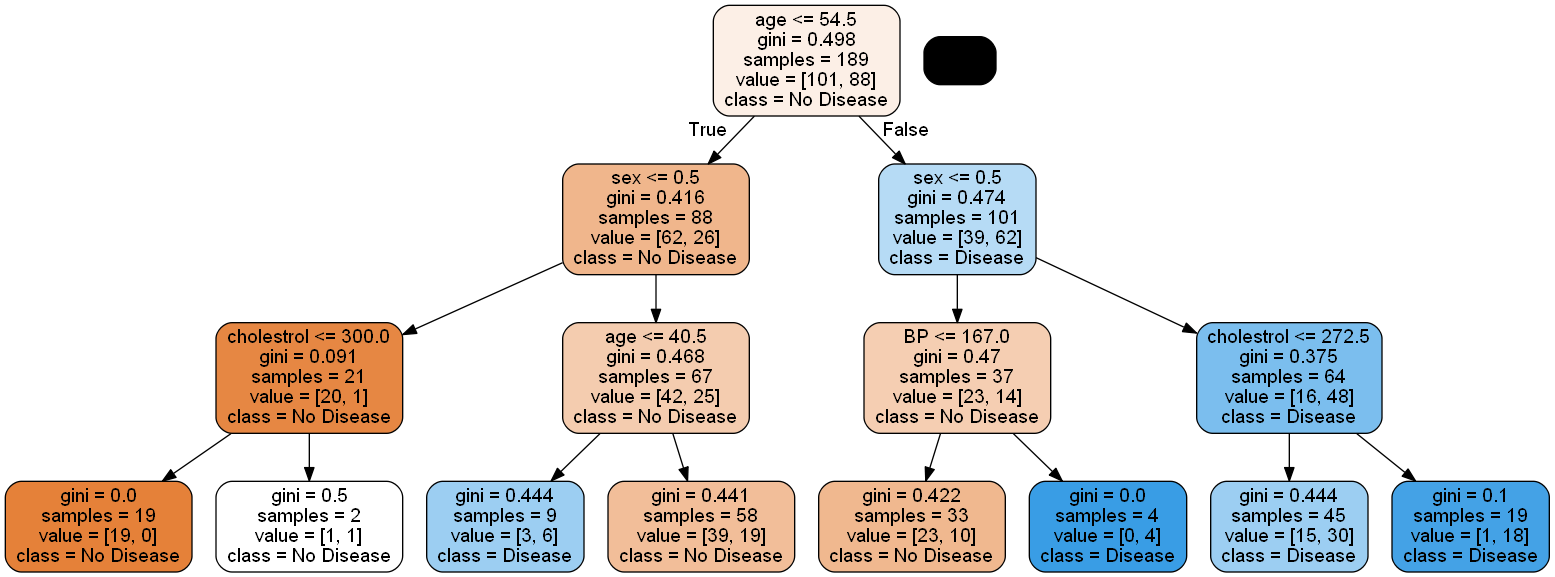

In [23]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,filled=True,rounded=True,
               feature_names=x.columns,class_names = ['No Disease','Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [24]:
#Evaluate Model Performance
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [27]:
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)